<a href="https://colab.research.google.com/github/RikuUchida/probabilistic_robotics2022/blob/master/robotics2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 改善前と後それぞれ5回の試行で、本当に改善したのかを確率分布を用いて考える

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
!pip install japanize-matplotlib
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ここでは、成功率を0.00～1.00まで0.01刻みとした、成功率の確率質量関数を考える。

そのため、
$$ P(t)=1/101 \quad (t=0.00, 0.01, ..., 1.00) $$
の一様分布を事前分布とし、

$$ P(t|a)=ηP(a|t)P(t) $$

を解くことで、試行の結果 a の後の成功率の分布がわかる。

また、 i - 1 回目までの試行を反映した成功率の確率分布を事前分布とみなすことで、
以下の式のように、i回の試行を反映した成功率の確率分布を求められる。
$$ P(t|a_{1:i})=ηP(a_1|t)P(t|a_{1:i-1}) $$


ここからは、実際に「完走→失敗→失敗→完走→完走」という試行のもと、成功率の確率分布を考える。



In [2]:
results_before = ["完走", "失敗", "失敗", "完走", "完走"]

In [3]:
def culc_probable_succeed(try_counts, t, results):
    Pt = np.linspace(1/101, 1/101, 101)
    for i in range(try_counts):
        if results[i] == "完走":
            Pt = Pt * t
        else:
            Pt = Pt * (1-t)
        Pt = Pt / sum(Pt)

    return Pt

In [4]:
import math
def culc_variance(average, Pt):
  var_Pt = 0
  for i in range (101):
    diff = (i/100 - average) ** 2
    var_Pt = var_Pt + diff * Pt[i]
  var = math.sqrt(var_Pt) 

  return var

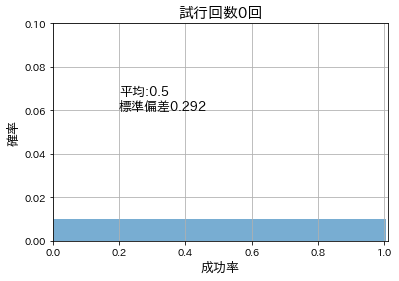

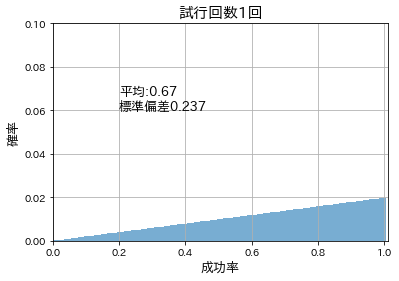

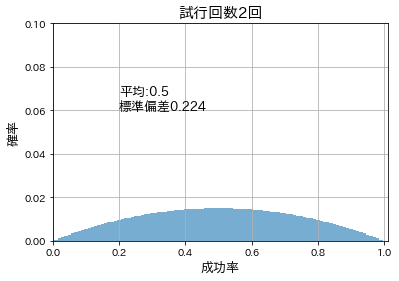

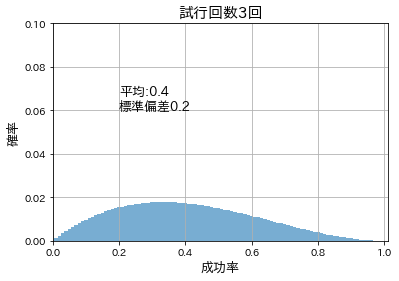

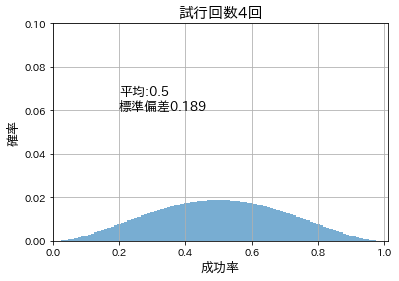

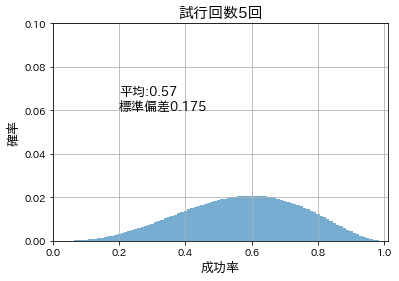

In [5]:
t = np.arange(0, 101) /100
for i in range(6):
    try_counts = i
    Pt = culc_probable_succeed(try_counts, t, results_before)
    ave = round(sum(Pt * t), 2)
    var = round(culc_variance(ave, Pt), 3)

    plt.bar(t, Pt, width=0.01, alpha=0.6)
    plt.text(0.2, 0.06, f"平均:{ave}\n標準偏差{var}", size=13)
    plt.xlabel("成功率", fontsize=13)
    plt.ylabel("確率", fontsize=13)
    plt.title(f"試行回数{i}回", fontsize=15)
    plt.xlim(0.00, 1.01)
    plt.ylim(0.00, 0.1)
    plt.grid()
    plt.show()

試行回数が変わるたびに、目に見えて分布が変わっている。

分散が大きいと、試行回数を増やした時に、変化した分布のとりえる範囲が広い。

In [6]:
results_after = ["完走","完走","完走","完走","完走"]

改良前と後をそれぞれ試行が5回の分布を比べてみる。

改良前：「完走→失敗→失敗→完走→完走」

改良後：「完走→完走→完走→完走→完走」

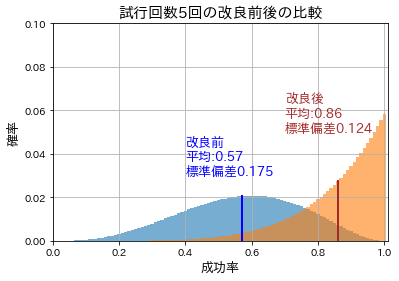

In [7]:
try_counts = 5
Pt_before = culc_probable_succeed(try_counts, t, results_before)
Pt_after = culc_probable_succeed(try_counts, t, results_after)

ave_before = round(sum(Pt_before * t), 2)
ave_after = round(sum(Pt_after * t), 2)
var_before = round(culc_variance(ave_before, Pt_before), 3)
var_after = round(culc_variance(ave_after, Pt_after), 3)

plt.text(0.4, 0.03, f"改良前\n平均:{ave_before}\n標準偏差{var_before}", size=13, color='blue')
plt.text(0.7, 0.05, f"改良後\n平均:{ave_after}\n標準偏差{var_after}", size=13, color='brown')

plt.vlines(ave_before, 0, 0.021, colors='blue', linewidth=2)
plt.vlines(ave_after, 0, 0.028, colors='brown', linewidth=2)
plt.bar(t, Pt_before, width=0.01, alpha=0.6)
plt.bar(t, Pt_after, width=0.01, alpha=0.6)
plt.xlabel("成功率", fontsize=13)
plt.ylabel("確率", fontsize=13)
plt.title("試行回数5回の改良前後の比較", fontsize=15)
plt.xlim(0.00, 1.01)
plt.ylim(0.00, 0.10)
plt.grid()
plt.show()



---
改善前は、

　平均　　：0.57

　標準偏差：0.175

改善後は、

　平均　　：0.86

　標準偏差：0.124

となった。
改良前と後の１標準偏差以内で重なっているところがあり、改良後の方がいい結果が出れるとは言い切れない。

試行回数が少ないことで分散が大きく、試行回数を増やした時に完走率が逆転する可能性がある。

# 試行回数をそれぞれ4回追加した分布を可視化してみる

試行結果は以下である。

改良前：「完走→失敗→失敗→完走→完走→失敗→失敗→完走→完走」

改良後：「完走→完走→完走→完走→完走→完走→完走→完走→完走」

In [8]:
results_before = ["完走", "失敗", "失敗", "完走", "完走", "失敗", "失敗", "完走", "完走"]
results_after = ["完走", "完走", "完走", "完走", "完走", "完走", "完走", "完走", "完走"]

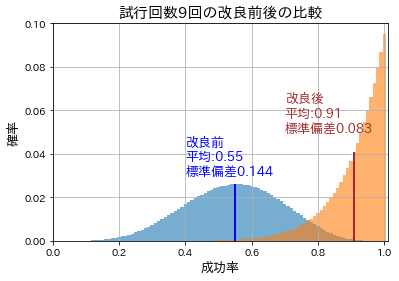

In [9]:
try_counts = 9
Pt_before = culc_probable_succeed(try_counts, t, results_before)
Pt_after = culc_probable_succeed(try_counts, t, results_after)

ave_before = round(sum(Pt_before * t), 2)
ave_after = round(sum(Pt_after * t), 2)
var_before = round(culc_variance(ave_before, Pt_before), 3)
var_after = round(culc_variance(ave_after, Pt_after), 3)

plt.text(0.4, 0.03, f"改良前\n平均:{ave_before}\n標準偏差{var_before}", size=13, color='blue')
plt.text(0.7, 0.05, f"改良後\n平均:{ave_after}\n標準偏差{var_after}", size=13, color='brown')

plt.vlines(ave_before, 0, 0.026, colors='blue', linewidth=2)
plt.vlines(ave_after, 0, 0.041, colors='brown', linewidth=2)
plt.bar(t, Pt_before, width=0.01, alpha=0.6)
plt.bar(t, Pt_after, width=0.01, alpha=0.6)
plt.xlabel("成功率", fontsize=13)
plt.ylabel("確率", fontsize=13)
plt.title("試行回数9回の改良前後の比較", fontsize=15)
plt.xlim(0.00, 1.01)
plt.ylim(0.00, 0.10)
plt.grid()
plt.show()

試行回数5回の時のように改良前と後の分布の1標準偏差以内で重なってはいないが、

まだ重なりがあるため改良前後で成功率が逆転する可能性が完全に消えたわけではない。